## Pose detection in image using mediapipe

In this article we will be doing pose detection using Mediapipe and OpenCV we will go in depth about all the process and code for the same later in the article but before let's understand some real world use cases of Pose detection.

### Application of Pose detection

1. Fitness application: This is one of the most modern use case of pose detecion and fitness industry is boosted by the same.
2. Camera Survellience: As theives are getting smart day by day it's time for us to make smart cameras with the help of pose detection and detect each moment of them.
3. Filters: To make more realistic, interactive and modern body filters for the applications which are widely being used by all age group people.

So let's build our very own pose detection app.

Note: I will be doing all the coding part in jupyter notebook though one can perform the same in any code editor yet jupyter notebook is preferrable as it is more interactive.

### Import the Libraries

Let's import all the libraries according to our requirements.

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

### Initialize the Pose Detection Model

In [3]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Set up the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Set up the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils 

So from here our very first step begins which is to initialize our pose detection model, this step is very much common in terms of creating the model as before passing any custom value to the model we first need to provide some compulsory model params and for the betterment this case will also help in model testing later in the process.

1. Hence, we will first initialize the mediapipe pose main class i.e. solutions.pose with a variable that will hold the instance of that mediapipe pose detection model 
2. Now as we have stored the instance of pose detection class in `mp_pose` variable now we will use this variable to call the Pose method as `mp_pose.Pose()` and store it in `pose_image` by this way we will set the function for pose estimation. Now let's discuss about the parameters in Pose function.
    * `static_image_mode`: It holds the boolean value (True/False), by default it get initialize with the false which means that it will treats the given images in the format of videos and ideal processing of each image will not be possible but when we switch it up to True then it will treat the given image in the ideal fashion seperate processing will be there i.e. it will not treat the given image as a video stream and that is our requirement here.
    * `min_detection_confidence`: As name suggests this argument will set the threshold value of the confidence level and it ranges from [0.0, 1.0] i.e. minimum confidence level is 0 and maximum confidence level is 1 and by default the value is 0.5, here we are setting the threshold value to 0.5.
3. Previously we have set the function for images now we will do the same for video streaming for that we will use the same `Pose` function and store the instance of same in `pose_video`. Let's look into its parameters as well.
    * `static_image_mode`: Here our requirement is to stream it for the videos then for that reason we will set the value to False.
    * `min_detection_confidence`: Here we have set the confidence threshold to 0.7
    * `min_tracking_confidence`: This is the tracking level condfidence i.e. it will detect that whether the person is detected or not based on the confidence level that we provide so that the problems of high robustness should not occur after the detection. Note: It will automatically get ignored when `static_image_mode` is set to True.
4. Now at the last we will use the `drawing_utils` function to draw all the landmarks points on the image or on the video (liev stream) that our model will detect from above processing.

## Perform Pose Detection

So now, we have overcome with all the prerquisites to start with pose detection using mediapipe hence, now we will make pose detection function which will help us to perform the detection in modular way and makes the whole pipeline more efficient.

First let's understand the functionality of this function in a nutshell then we will breakdown the code:
This function will perform the pose detection on the person whose is closely associated in the image and draw all the landmarks points in the pose which will be detected in the image.

Arguments:
   * image:   This argument will demand for the image in which the person is there to be detected.
   * pose:    The pose function which we created for images and video one of those will be required according to the requirements
   * draw:    This argument will have the boolean value when the value is True that means the function should draw the landmarks points otherwise not.
   * display: This argument will also expect the boolean value and if it has the True value then it will show both the input image and the resultant image otherwise not.

Output:
   * output_image: It will return the input image with the landmarks points which were detected in the person's pose.
   * results:      It shows the output on the input image i.e. it is responsible for the visibility of the output on the image.

In [4]:
def detectPose(image_pose, pose, draw=False, display=False):
    
    original_image = image_pose.copy()
    
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    
    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:
    
        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=2))

    if display:

        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
        plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

    else:

        return original_image


Code-breakdown:

1. First we will be creating the copy of the original image so that we don't loss anything from the original image while preprocessing.
2. Later we will be converting the Blue Green Red format to Red Green Blue format as in computer vision it is widely used.
3. Now we will be processing the pose detection on the converted image format using the `process` function.
4. It's time for some validation and check that whether the landmarks were detected in the image or not later if the landmarks got detected then we will draw them on the image using `draw_landmarks` function.
5. Previously first we did the validations before drawing the landmarks now we will check that if the display argument is allowing to show the resultant and input image or not.
6. If the above conditon is true then the original as well as resultant image is displayed.
7. Otherwise it will only return the `output image` and the `results`.

Now we will test the function **`detectPose()`** created above to perform pose detection on a sample image and display the results.

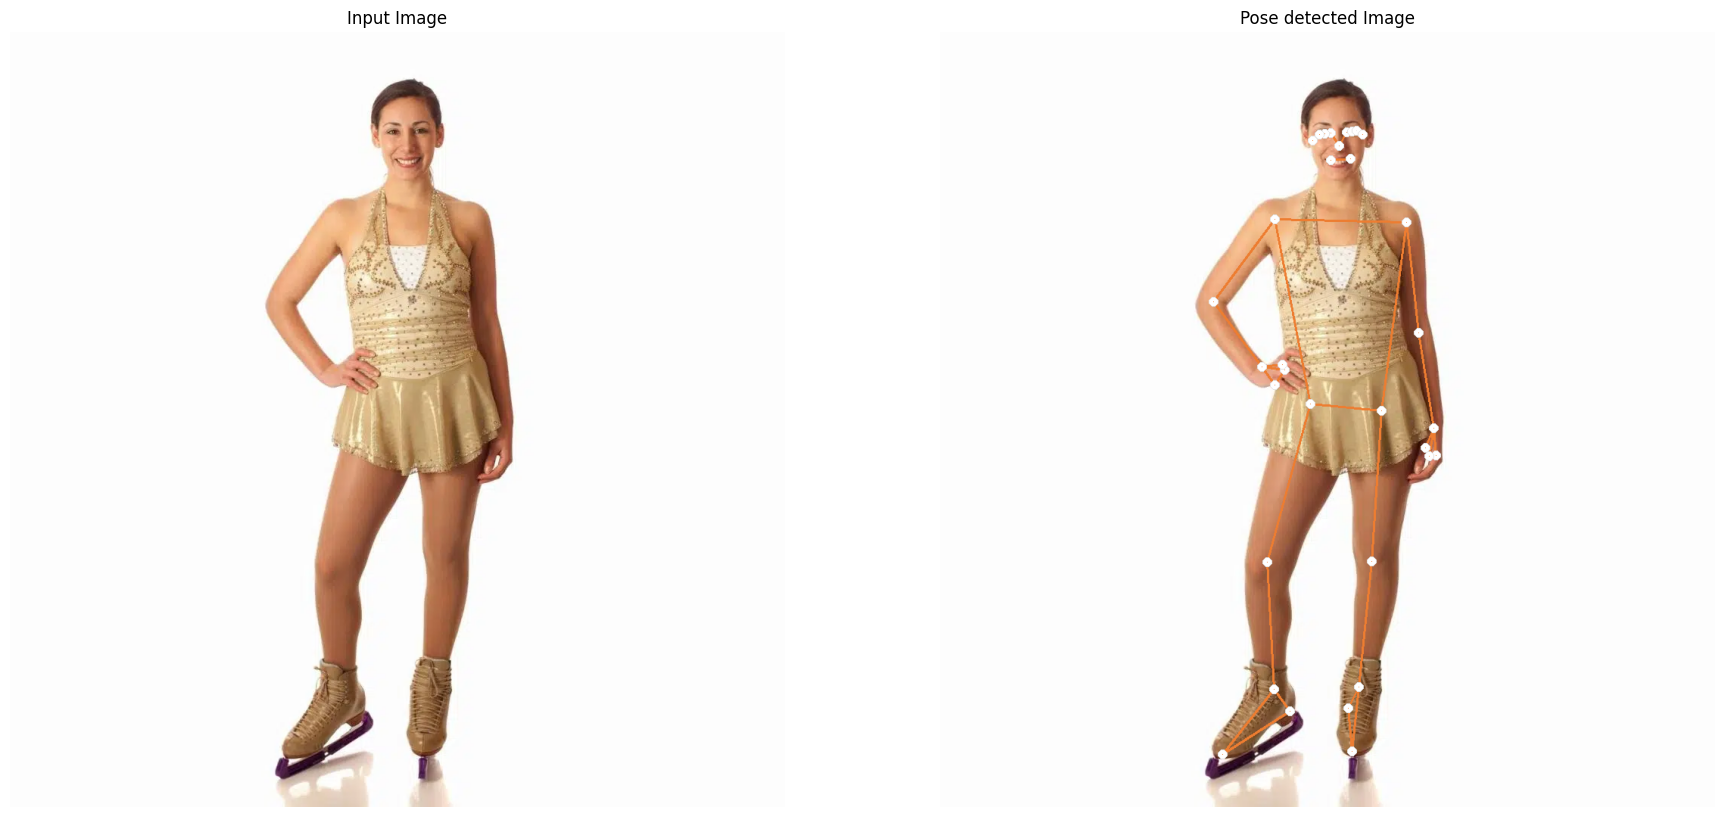

In [9]:
# Here we will read our image from the specified path to detect the pose
image_path = '../images/test_image_15.jpg'
output = cv2.imread(image_path)
detectPose(output, pose_image, draw=True, display=True)

## Conclusion

As we can see that the results are quite pleasing and it is visible that mediapipe has done quite good work in terms of pose detection while our `detectPose()` was able to handle the pipeline of the process smoothly and efficiently. You can try with different images to test this function all you have to do is change the path of the image in `image_path` variable.